In [32]:
# import numpy as np
import cv2
# !pip3 install tensorflow==2.12.*
# !pip3 uninstall numpy 
# import tensorflow as tf

In [6]:
import tensorflow as tf
import keras
# import cv2


In [7]:
model=keras.models.load_model('55_vgg19.h5')


2023-04-17 13:16:12.386436: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


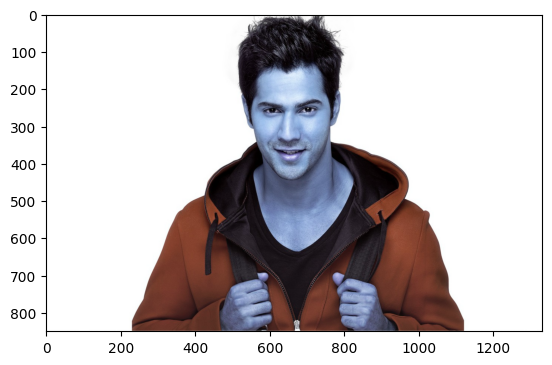

[[518 155 270 270]
 [835 731  60  60]]


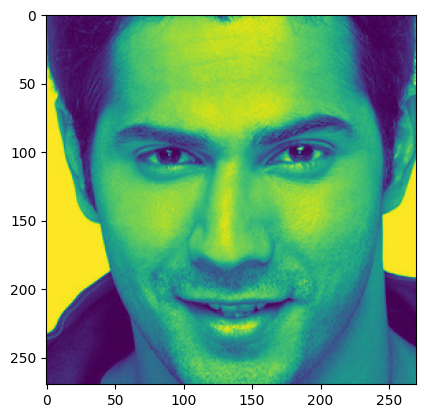

1/1 [==============================] - 2s 2s/step


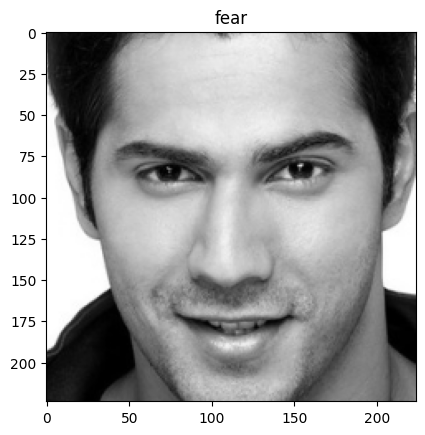

In [8]:
import matplotlib.pyplot as plt
img=cv2.imread('actor.jpg')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
plt.imshow(img)
plt.show()
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)
# Draw a rectangle around each detected face
print(faces)
x=faces[0][0]
y=faces[0][1]
w=faces[0][2]
h=faces[0][3]
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
imag=gray[y:y+h, x:x+w]

plt.imshow(imag)
plt.show()
img=cv2.resize(imag,(224,224),interpolation=cv2.INTER_LINEAR)
img_3=cv2.merge([img,img,img])
import numpy as np
batch_img = np.expand_dims(img_3, axis=0)
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']
y_pred=model.predict(batch_img)

y_pred_true=np.argmax(y_pred)
plt.title(emotions[y_pred_true])
plt.imshow(img_3)
plt.show()

In [9]:
import numpy as np

# !pip install tensorflow==2.12.*
from tensorflow.keras.models import model_from_json

In [10]:
model_json_file = 'model.json'
model_weights_file = 'model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)

In [11]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [30]:
# pip install tensorflow==2.12.*
cap = cv2.VideoCapture(0)
import copy
import matplotlib.pyplot as plt

while True:
    
    ret, frame = cap.read()
    img = copy.deepcopy(frame)
    
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(faces)
    
    for (x,y,w,h) in faces:
        fc = gray[y:y+h, x:x+w]
        
        roi = cv2.resize(fc, (48,48))
        pred = loaded_model.predict(roi[np.newaxis, :, :, np.newaxis])
#         print(pred)
        text_idx=np.argmax(pred)
        text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        if text_idx == 0:
            text= text_list[0]
        if text_idx == 1:
            text= text_list[1]
        elif text_idx == 2:
            text= text_list[2]
        elif text_idx == 3:
            text= text_list[3]
        elif text_idx == 4:
            text= text_list[4]
        elif text_idx == 5:
            text= text_list[5]
        elif text_idx == 6:
            text= text_list[6]
        cv2.putText(img, text, (x, y-5),
           cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
            
    
    cv2.imshow("frame", img)
    key = cv2.waitKey(1) & 0xFF
    if key== ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

--(!) No captured frame -- Break!


[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (2075) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module v4l2src18 reported: Device '/dev/video0' is busy
[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1053) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ WARN:0] global ./modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


# Take Two


In [11]:
import tensorflow as tf 
import keras 
import cv2
import copy 
import numpy as np
from tensorflow.keras.models import model_from_json


#n Model From Kaggle 

model_json_file = 'model.json'
model_weights_file = 'model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)
    
# model 
model=keras.models.load_model('55_vgg19.h5')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

emotions=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read()
    img = copy.deepcopy(frame)
    if frame is None :
        print('--(!) No captured frame -- Break!')
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in  faces:
        fc = gray[y:y+h,x:x+w]
        
        roi = cv2.resize(fc, (48,48))
        pred = loaded_model.predict(roi[np.newaxis, :, :, np.newaxis])
#   

#         img1 = cv2.resize(fc,(224,224),interpolation=cv2.INTER_LINEAR)
#         img2 = cv2.merge([img1,img1,img1])
#         batch_img = np.expand_dims(img2, axis=0)
        
        #predicitng the labels
        
        pred = model.predict(batch_img)
        
        idx = np.argmax(pred)
        text = emotions[idx]
        
        cv2.putText(img,text,(x,y-5),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
        
        img  = cv2.rectangle(img,(x,y), (x+w,y+h), (0,255,0),3)
        
        
    cv2.imshow('Emotion_detector',img)
    key = cv2.waitKey(1) & 0xFF
    if key== ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


1/1 [==============================] - 0s 251ms/step
